In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

$$ f(x, y) = sin(x^2) + cos(yx) $$
$$ \frac{df}{dx} = 2xcos(x^2) - ysin(yx) $$
$$ \frac{df}{dy} = -xsin(yx) $$

In [194]:
# sin(x^2) + cos(yx)
def f(x, y):
    return np.sin(x*x) + np.cos(y*x)

# partial derivative of f by x
def dfdx(x, y):
    return 2*x*np.cos(x*x) - y*np.sin(y*x) 

# partial derivative of f by y
def dfdy(x, y):
    return -x * np.sin(y*x)

# gradient of f
def grad_vector(x, y):
    return np.array([dfdx(x,y), dfdy(x,y)])

In [313]:
# counting values of f for making a plot
x = np.arange(5.2, 5.7, 0.005)
y = np.arange(4.9, 5.8, 0.005)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

C:\Users\4CFA~1\AppData\Local\Temp/ipykernel_7204/519174763.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


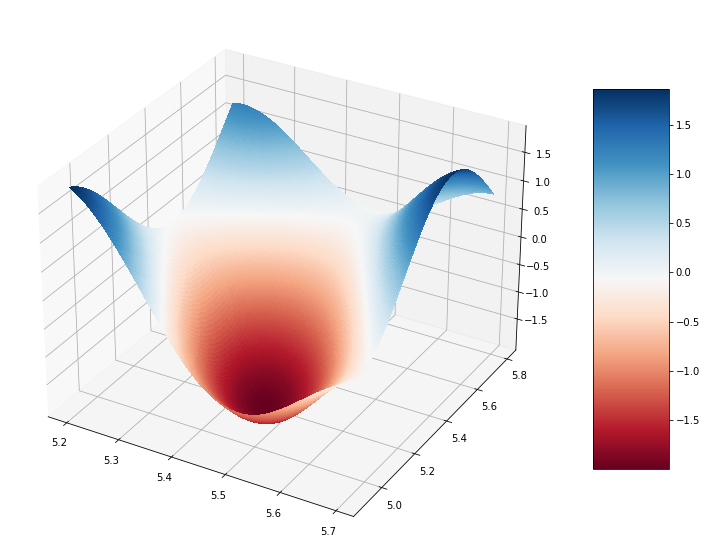

In [314]:
fig = plt.figure(figsize = (15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu, antialiased=False)
fig.colorbar(surf, shrink=0.7, aspect=5)
plt.show()

In [334]:
def gradient_descent(x_init, diff, eta=0.1, max_iter=100):
    eps = 0.00001
    grad_iter = 1
    seq_x = []
    seq_y = []
    x_prev = x_init
    x_next = np.subtract(x_init, eta*grad_vector(x_prev[0],x_prev[1]))
    
    # seq_x and seq_y for getting x_next value on each iteration
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    diff.append(abs(x_next - x_prev))
    # linalg norm is taken because in multiple dimensions case x_next and x_prev are vectors.
    # so we need to get square root of the sum of the absolute squares of its elements
    while np.linalg.norm(np.subtract(x_next,x_prev)) > eps and grad_iter < max_iter:
        
        x_prev = x_next
        x_next = x_prev - eta*grad_vector(x_prev[0],x_prev[1])
        grad_iter += 1
        diff.append(abs(x_next - x_prev))
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    return (x_next, grad_iter, seq_x, seq_y, diff)

In [360]:
def gradient_descent_adam(x_init, diff, eta=0.1, max_iter=100):
    eps = 0.00001
    delta = 0.0000001
    beta_1 = 0.9
    beta_2 = 0.999
    
    grad_iter = 1
    seq_x = []
    seq_y = []
    
    x_prev = x_init   
    s_prev, r_prev = 0, 0
    
    g = grad_vector(x_prev[0], x_prev[1])
    s_next = np.add(beta_1 * s_prev, (1-beta_1) * g)
    r_next = np.add(beta_2 * r_prev, (1-beta_2) * np.power(g,2))
    
    s_hat = s_next / (1 - beta_1 ** grad_iter)
    r_hat = r_next / (1 - beta_2 ** grad_iter)

    delta_x = eta * s_hat / (np.sqrt(r_hat) + delta)

    x_next = np.subtract(x_prev, delta_x)

    seq_x.append(x_next[0])
    seq_y.append(x_next[1])
    diff.append(abs(x_next-x_prev))
    while np.linalg.norm(np.subtract(x_next,x_prev)) > eps and grad_iter < max_iter:
        x_prev, s_prev, r_prev = x_next, s_next, r_next
        g = grad_vector(x_prev[0], x_prev[1])
        grad_iter += 1
        
        s_next = np.add(beta_1 * s_prev, (1-beta_1) * g)
        r_next = np.add(beta_2 * r_prev, (1-beta_2) * np.power(g,2))
        
        s_hat = s_next / (1 - beta_1 ** grad_iter)
        r_hat = r_next / (1 - beta_2 ** grad_iter)
        
        delta_x = eta * s_hat / (np.sqrt(r_hat) + delta)

        x_next = np.subtract(x_prev, delta_x)
        
        seq_x.append(x_next[0])
        seq_y.append(x_next[1])
        diff.append(abs(x_next-x_prev))
    return (x_next, grad_iter, seq_x, seq_y, diff)

In [361]:
def contour_plot(x_seq,y_seq, x1, title):
    plt.figure(figsize=(12,9))
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0],x1[1],'ro')
    plt.title(title)
    plt.plot(x_seq,y_seq,'ro')
    plt.show()

Minimum (x,y) from gradient descent: [5.46306267 5.17557009]
Number of gradient descent iterations: 36


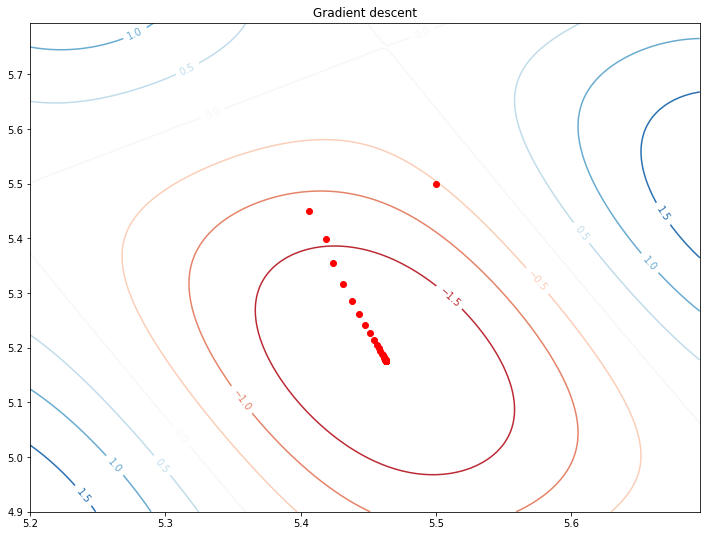

In [362]:
diff = []
grad_output = gradient_descent(x_init=np.array([5.5,5.5]), diff=diff, eta=0.01, max_iter=5000)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([5.5,5.5]), 'Gradient descent')

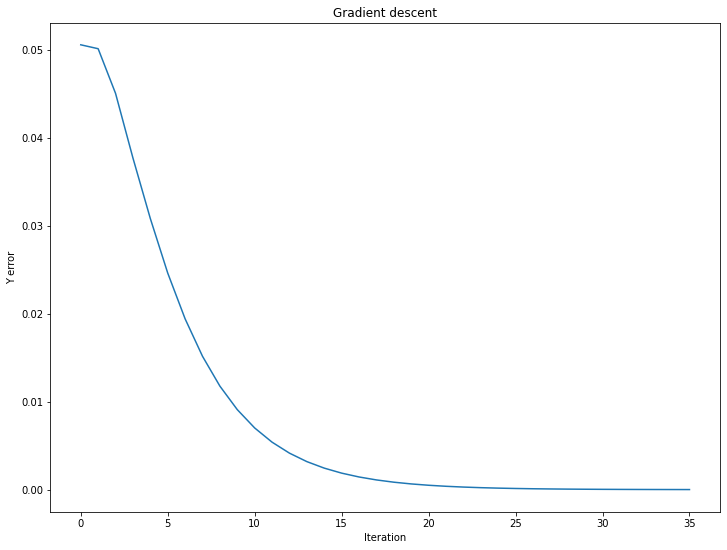

In [364]:
plt.figure(figsize=(12,9))
plt.title("Gradient descent")
plt.xlabel('Iteration')
plt.ylabel('Y error')
plt.plot(np.array(diff)[:,1])
plt.show()

Minimum (x,y) from gradient descent: [5.4631001  5.17488184]
Number of gradient descent iterations: 123


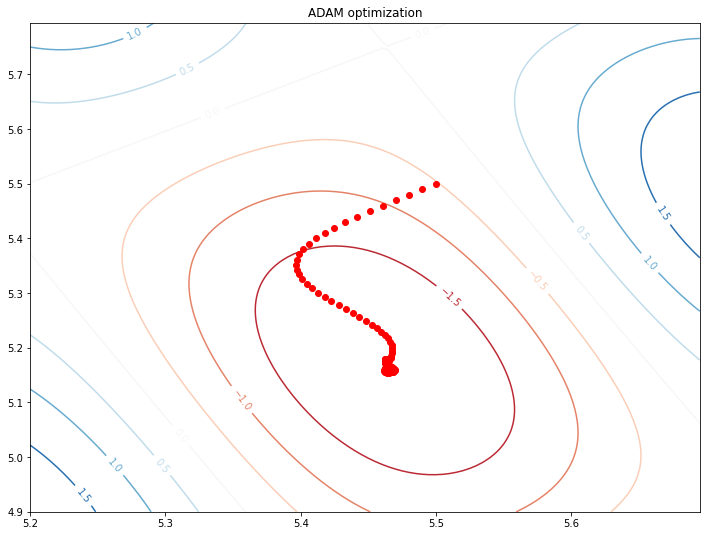

In [367]:
grad_output = gradient_descent_adam(x_init=np.array([5.5,5.5]), eta=0.01, max_iter=5000, diff=diff)

print('Minimum (x,y) from gradient descent: %s' %grad_output[0])
print('Number of gradient descent iterations: %s' %grad_output[1])

contour_plot(grad_output[2],grad_output[3], np.array([5.5,5.5]), 'ADAM optimization')

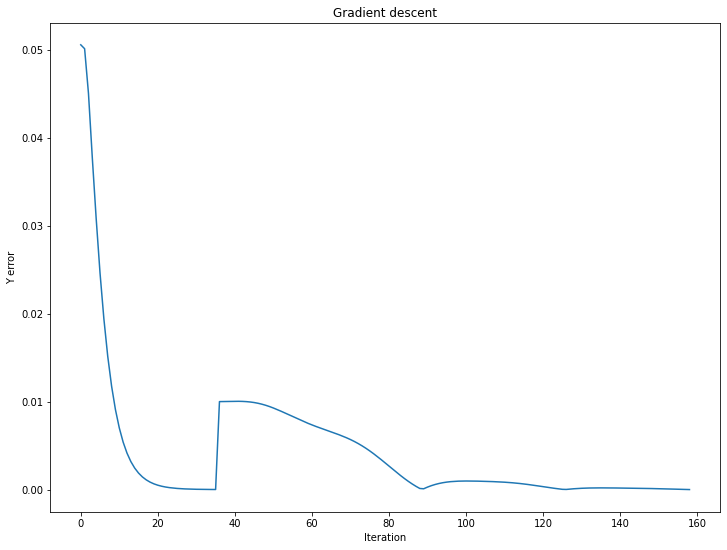

In [370]:
plt.figure(figsize=(12,9))
plt.title("Gradient descent")
plt.xlabel('Iteration')
plt.ylabel('Y error')
plt.plot(np.array(diff)[:,1])
plt.show()